In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [4]:
type(x)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
x = pd.DataFrame(x)

<Axes: xlabel='0', ylabel='1'>

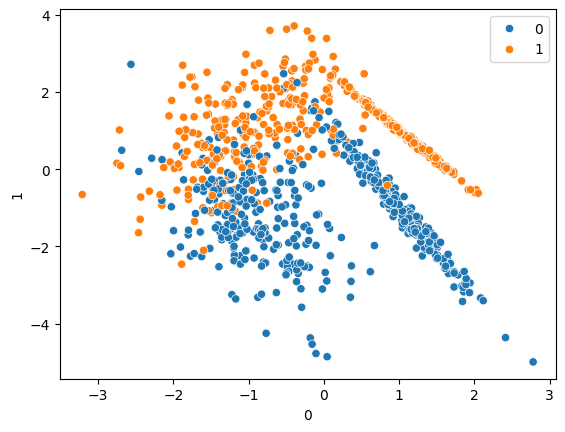

In [7]:
sns.scatterplot(x= x[0], y = x[1], hue=y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.svm import SVC 

In [11]:
svc = SVC(kernel="linear")

In [12]:
svc.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
y_pred=svc.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [15]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
score1 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       104
           1       0.83      0.89      0.86        96

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

[[87 17]
 [11 85]]


In [16]:
score1

0.86

In [17]:
poly = SVC(kernel="poly")
poly.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
y_pred1 = poly.predict(x_test)

In [19]:
score2 = accuracy_score(y_test, y_pred1)
score2

0.81

In [20]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       104
           1       0.75      0.90      0.82        96

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

[[76 28]
 [10 86]]


In [21]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(x_train, y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_pred2 = sigmoid.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
score3 = accuracy_score(y_test, y_pred2)
print(score3)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       104
           1       0.76      0.80      0.78        96

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

[[80 24]
 [19 77]]
0.785


In [24]:
# HYPERPARAMETER TUNING

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
params = {"C": [0.1, 1, 10, 100, 1000], "gamma": [1,0.1, 0.01, 0.001, 0.0001], "kernel" :["rbf"]}

In [27]:
grid = GridSearchCV(SVC(), param_grid=params, refit=True, cv=5, verbose = 3)

In [28]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.869 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.894 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.819 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [29]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [30]:
y_pred3 = grid.predict(x_test)

In [31]:
score4 = accuracy_score(y_test, y_pred3)

In [32]:
score4

0.89

In [33]:
l = []
l.append([score1, score2, score3, score4])

In [34]:
l

[[0.86, 0.81, 0.785, 0.89]]

In [35]:
print(np.max(np.array(l)))

0.89
